In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../correction_performance.csv")
df

,correction_model,dataset,model,noise_type,data_coverage,fit_time (s),mse,mape,sample_size
0,LR,mnist,cusMLP,determ,0.1,0.013259,1.788503e-19,2.633291e-10,46887
1,LR,mnist,cusMLP,determ,0.3,0.001928,2.800071e-18,1.163307e-09,140662
2,LR,mnist,cusMLP,determ,0.5,0.002637,1.464369e-17,3.114733e-09,234437
3,LR,mnist,cusMLP,determ,0.7,0.003462,1.887340e-19,3.024215e-10,328211
4,LR,mnist,cusMLP,determ,0.9,0.004339,5.195344e-18,1.557856e-09,421986
...,...,...,...,...,...,...,...,...,...
175,MLP10_10_200iter,cifar10,cusCNN,randm,0.3,14.441177,2.295606e-04,9.494296e-04,621870
176,MLP10_10_200iter,cifar10,cusCNN,randm,0.5,25.368040,2.295487e-04,9.354309e-04,1036451
177,MLP10_10_200iter,cifar10,cusCNN,randm,0.7,37.491253,2.295606e-04,9.495156e-04,1451031
178,MLP10_10_200iter,cifar10,cusCNN,randm,0.9,47.595510,2.295323e-04,9.167629e-04,1865611


# data_cocerge
- LR
    - deterministic
    - stochastic
- MLP
    - deterministic
    - stochastic

In [3]:
LR_df = df[df['correction_model'] == 'LR']
LR_deter_df = LR_df[LR_df['noise_type'] == 'determ']
LR_stoch_df = LR_df[LR_df['noise_type'] == 'randm_proc']

datasets = np.unique(LR_df['dataset'])
models = np.unique(LR_df['model'])

print(datasets)
print(models)

['cifar10' 'cifar100' 'mnist']
['cusCNN' 'cusMLP' 'resnet18']


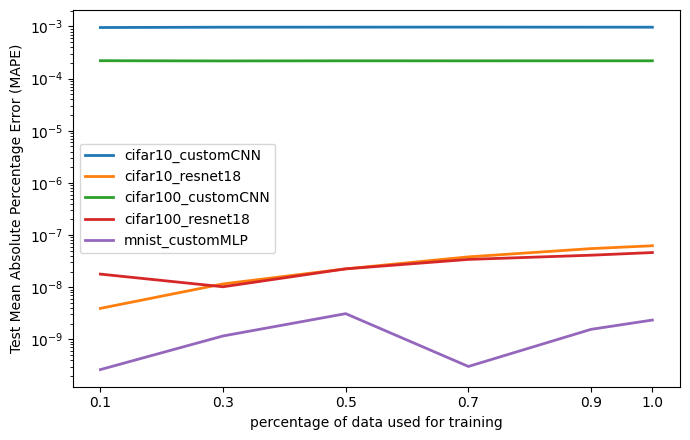

In [4]:
plt.figure(figsize=(7, 4.5))
# determ 1st
for d in datasets:
    # for each dataset
    for m in models:
        # for each model
        # get two list of values: data_coverage and mape
        label = d + '_' + m.replace('cus', 'custom')
        # print(label)
        df_filtered_by_dataset = LR_deter_df[LR_deter_df['dataset'] == d]
        final_df_filtered_by_model = df_filtered_by_dataset[df_filtered_by_dataset['model'] == m]
        if final_df_filtered_by_model.empty:
            continue
        data_coverage = final_df_filtered_by_model['data_coverage'].values
        mape = final_df_filtered_by_model['mape'].values
        plt.plot(data_coverage, mape, label=label, linewidth=2)
# change to log scale
plt.yscale('log')
# match x-axis to the range of data coverage, and show x-axis label (match data coverage list val)
# plt.xlim([0.1, 1])
plt.xticks(data_coverage)

# place legend at the center left of the plot
plt.legend(loc='center left')
plt.xlabel('percentage of data used for training')
plt.ylabel('Test Mean Absolute Percentage Error (MAPE)')
plt.tight_layout()

# plt.title('MAPE vs. data coverage (deterministic noise)')
plt.savefig('plots/LR_MAPE_vs_DC_determ.png')
plt.show()

## Data coverage vs training time

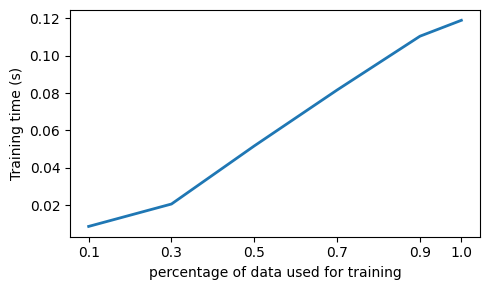

In [5]:
# get a list of times for each datacoverage
data_coverage = np.unique(LR_deter_df['data_coverage'])
times = []
for dc in data_coverage:
    # for each data coverage, get a list of times
    LR_deter_df_filtered_by_dc = LR_deter_df[LR_deter_df['data_coverage'] == dc]
    time_vals = LR_deter_df_filtered_by_dc['fit_time (s)'].values
    # print(times)
    # avg
    avg_time = np.mean(time_vals)
    times.append(avg_time)

# plot
plt.figure(figsize=(5, 3))
plt.plot(data_coverage, times, linewidth=2)
plt.xticks(data_coverage)
plt.xlabel('percentage of data used for training')
plt.ylabel('Training time (s)')
plt.tight_layout()
# plt.title('Training time vs. data coverage (deterministic noise)')
plt.savefig('plots/LR_time_vs_DC_determ.png')
plt.show()

# MLP

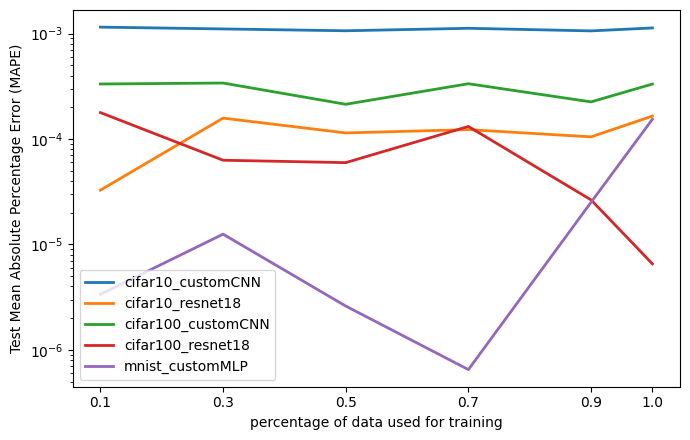

In [6]:
MLP_df = df[df['correction_model'] == 'MLP10_10_200iter']
MLP_deter_df = MLP_df[MLP_df['noise_type'] == 'determ']
MLP_stoch_df = MLP_df[MLP_df['noise_type'] == 'randm_proc']

datasets = np.unique(LR_df['dataset'])
models = np.unique(LR_df['model'])

plt.figure(figsize=(7, 4.5))
# determ 1st
for d in datasets:
    # for each dataset
    for m in models:
        # for each model
        # get two list of values: data_coverage and mape
        label = d + '_' + m.replace('cus', 'custom')
        # print(label)
        df_filtered_by_dataset = MLP_deter_df[MLP_deter_df['dataset'] == d]
        final_df_filtered_by_model = df_filtered_by_dataset[df_filtered_by_dataset['model'] == m]
        if final_df_filtered_by_model.empty:
            continue
        data_coverage = final_df_filtered_by_model['data_coverage'].values
        mape = final_df_filtered_by_model['mape'].values
        plt.plot(data_coverage, mape, label=label, linewidth=2)
# change to log scale
plt.yscale('log')
# match x-axis to the range of data coverage, and show x-axis label (match data coverage list val)
# plt.xlim([0.1, 1])
plt.xticks(data_coverage)

# place legend at the bottom right of the plot
plt.legend(loc='lower left')
plt.xlabel('percentage of data used for training')
plt.ylabel('Test Mean Absolute Percentage Error (MAPE)')
plt.tight_layout()

# plt.title('MAPE vs. data coverage (deterministic noise)')
plt.savefig('plots/MLP_MAPE_vs_DC_determ.png')
plt.show()

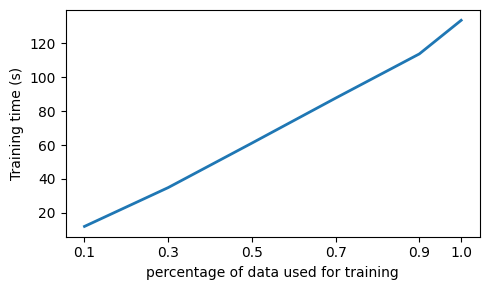

In [7]:
# get a list of times for each datacoverage
data_coverage = np.unique(MLP_deter_df['data_coverage'])
times = []
for dc in data_coverage:
    # for each data coverage, get a list of times
    MLP_deter_df_filtered_by_dc = MLP_deter_df[MLP_deter_df['data_coverage'] == dc]
    time_vals = MLP_deter_df_filtered_by_dc['fit_time (s)'].values
    # print(times)
    # avg
    avg_time = np.mean(time_vals)
    times.append(avg_time)

# plot
plt.figure(figsize=(5, 3))
plt.plot(data_coverage, times, linewidth=2)
plt.xticks(data_coverage)
plt.xlabel('percentage of data used for training')
plt.ylabel('Training time (s)')
plt.tight_layout()
# plt.title('Training time vs. data coverage (deterministic noise)')
plt.savefig('plots/MLP_time_vs_DC_determ.png')
plt.show()

# LR random proc MAPE plots 

In [20]:
determ_randm_df = pd.DataFrame()

exps_names = []
mape_vals = []

for d in datasets:
    for m in models:
        # get two list of values: data_coverage and mape
        label = d + '_' + m.replace('cus', 'custom')
        df_filtered_by_dataset = LR_df[LR_df['dataset'] == d]
        final_tmp_df = df_filtered_by_dataset[df_filtered_by_dataset['model'] == m]
        if final_tmp_df.empty:
            continue
        # For one noise type, compute avg mape for all data coverage
        determ_avg_mape = np.mean(final_tmp_df[final_tmp_df['noise_type'] == 'determ']['mape'].values)
        randm_proc_avg_mape = np.mean(final_tmp_df[final_tmp_df['noise_type'] == 'randm_proc']['mape'].values)
        # how much times better is the model with deterministic noise
        times_better = randm_proc_avg_mape / determ_avg_mape
        # print(label, times_better)

        # format print, use scientific notation
        print("{} : {:.2e}; {:.2e}".format(label, determ_avg_mape, randm_proc_avg_mape))


cifar10_customCNN : 9.68e-04; 9.09e-04
cifar10_resnet18 : 3.23e-08; 2.42e-04
cifar100_customCNN : 2.20e-04; 2.51e-04
cifar100_resnet18 : 2.87e-08; 2.24e-04
mnist_customMLP : 1.46e-09; 3.38e-04


In [23]:
# LR_df[LR_df['dataset'] == 'cifar10']